In [1]:
!python3 -m pip install autogluon

     |████████████████████████████████| 572 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 64.8 MB 167 kB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.6 MB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 882 kB 45.4 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 54.3 MB/s eta 0:00:01
     |████████████████████████████████| 810 kB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.2 MB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 17.4 MB/s ta 0:00:01
     |████████████████████████████████| 7.1 MB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 13.7 MB/s eta 0:00:01
     |██████████████████████████

     |████████████████████████████████| 64 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 14.3 MB/s eta 0:00:01
  Created wheel for fastparquet: filename=fastparquet-0.4.1-cp36-cp36m-linux_x86_64.whl size=7123181 sha256=75b87f03c45d8b0407632362c04f0ef45cc1a1fe0e41da5d7bbab17ae0bd1132
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8a/c2/8c/3b80e2a78a9932c93ac3fd0c449599c6b1f6fb3ccc4640f331
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.10-cp36-cp36m-linux_x86_64.whl size=3001031 sha256=12a84b885068a360dd1f0f058e128a3004409513350eaddde2ab5f545380e0c6
  Stored in directory: /home/ec2-user/.cache/pip/wheels/70/71/a2/00ca7cb0f71294d73e8791d6fe5cd0c7401066ec3b7e1026db
  Created wheel for openml: filename=openml-0.10.2-py3-none-any.whl size=190318 sha256=00a872b0c56bfb22518b4d43e59ad084f1e7694e1e7aa7c979de66842d5c4c31
  Stored in directory: /home/ec2-user/.cache/pip/wheels/45/83/27/a45cc845ff2497e34bfc17403e649249e5e717adb08698903d
  Created wheel f

  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=84fc0e91f1c2ba61ccd90aa6ed78b3f7c20d5c9135aed9ba3be9d078d15d3648
  Stored in directory: /home/ec2-user/.cache/pip/wheels/53/ba/da/8562a6a6dbb428fd1ecc21053106df3948645cd991958f669b
Successfully built fastparquet ConfigSpace openml thrift typing sacremoses contextvars liac-arff
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install mxnet-cu100

     |████████████████████████████████| 827.8 MB 4.4 kB/s  eta 0:00:01     |████▏                           | 109.1 MB 64.0 MB/s eta 0:00:12     |█████████▍                      | 243.0 MB 65.8 MB/s eta 0:00:09
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
import autogluon as ag
from autogluon import TabularPrediction as task


In [5]:
train_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
train_data = train_data.head(500) # subsample 500 data points for faster demo
print(train_data.head())


Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv | Columns = 15 / 15 | Rows = 39073 -> 39073


   age   workclass  fnlwgt   education  education-num       marital-status  \
0   25     Private  178478   Bachelors             13        Never-married   
1   23   State-gov   61743     5th-6th              3        Never-married   
2   46     Private  376789     HS-grad              9        Never-married   
3   55           ?  200235     HS-grad              9   Married-civ-spouse   
4   36     Private  224541     7th-8th              4   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Tech-support       Own-child   White   Female             0   
1    Transport-moving   Not-in-family   White     Male             0   
2       Other-service   Not-in-family   White     Male             0   
3                   ?         Husband   White     Male             0   
4   Handlers-cleaners         Husband   White     Male             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United

In [6]:
label_column = 'class'
print("Summary of class variable: \n", train_data[label_column].describe())


Summary of class variable: 
 count        500
unique         2
top        <=50K
freq         394
Name: class, dtype: object


In [7]:
dir = 'agModels-predictClass' # specifies folder where to store trained models
predictor = task.fit(train_data=train_data, label=label_column, output_directory=dir)


Beginning AutoGluon training ...
AutoGluon will save models to agModels-predictClass/
AutoGluon Version:  0.0.13
Train Data Rows:    500
Train Data Columns: 15
Preprocessing data ...
Here are the 2 unique label values in your data:  [' <=50K', ' >50K']
AutoGluon infers your prediction problem is: binary  (because only two unique label-values observed).
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
Train Data Class Count: 2
NumExpr defaulting to 4 threads.
Feature Generator processed 500 data points with 14 features
Original Features (raw dtypes):
	int64 features: 6
	object features: 8
Original Features (inferred dtypes):
	int features: 6
	object features: 8
Generated Features (special dtypes):
Processed Features (raw dtypes):
	int features: 6
	category features: 8
Processed Features:
	int features: 6
	categor

In [8]:
test_data = task.Dataset(file_path='https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
print(test_data_nolab.head())


Loaded data from: https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv | Columns = 15 / 15 | Rows = 9769 -> 9769


   age          workclass  fnlwgt      education  education-num  \
0   31            Private  169085           11th              7   
1   17   Self-emp-not-inc  226203           12th              8   
2   47            Private   54260      Assoc-voc             11   
3   21            Private  176262   Some-college             10   
4   17            Private  241185           12th              8   

        marital-status        occupation relationship    race      sex  \
0   Married-civ-spouse             Sales         Wife   White   Female   
1        Never-married             Sales    Own-child   White     Male   
2   Married-civ-spouse   Exec-managerial      Husband   White     Male   
3        Never-married   Exec-managerial    Own-child   White   Female   
4        Never-married    Prof-specialty    Own-child   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country  
0             0             0              20   United-States  
1             0         

In [9]:
predictor = task.load(dir) # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)


Evaluation: accuracy on test data: 0.8089876138806429
Evaluations on test data:
{
    "accuracy": 0.8089876138806429,
    "accuracy_score": 0.8089876138806429,
    "balanced_accuracy_score": 0.6254342868663129,
    "matthews_corrcoef": 0.3831793023721897,
    "f1_score": 0.8089876138806428
}


Predictions:   [' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' <=50K']


Detailed (per-class) classification report:
{
    " <=50K": {
        "precision": 0.8123252432613801,
        "recall": 0.9747684874513488,
        "f1-score": 0.8861639824304537,
        "support": 7451
    },
    " >50K": {
        "precision": 0.7729468599033816,
        "recall": 0.27610008628127697,
        "f1-score": 0.406865861411316,
        "support": 2318
    },
    "accuracy": 0.8089876138806429,
    "macro avg": {
        "precision": 0.7926360515823809,
        "recall": 0.6254342868663129,
        "f1-score": 0.6465149219208848,
        "support": 9769
    },
    "weighted avg": {
        "precision": 0.8029814933766589,
        "recall": 0.8089876138806429,
        "f1-score": 0.7724355512171912,
        "support": 9769
    }
}


In [10]:
filename = ag.download('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
ag.unzip(filename)


'data'

In [11]:
from autogluon import ImageClassification as task

dataset = task.Dataset('data/train')

test_dataset = task.Dataset('data/test', train=False)


In [ ]:
classifier = task.fit(dataset,
                      epochs=5,
                      ngpus_per_trial=1,
                      verbose=False)

scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.174.36/27558/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



Model file not found. Downloading.


100%|██████████| 55344/55344 [00:01<00:00, 41725.23KB/s]


In [ ]:
ag.get_gpu_count() 

In [8]:
!pip install torch 
!pip install torchvision

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 5.9 MB 13.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm

In [10]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

# the datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
def train_mnist(args, reporter):
    # get variables from args
    lr = args.lr
    wd = args.wd
    epochs = args.epochs
    net = args.net
    print('lr: {}, wd: {}'.format(lr, wd))

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Model
    net = net.to(device)

    if device == 'cuda':
        net = nn.DataParallel(net)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=args.lr, momentum=0.9, weight_decay=wd)

    # datasets and dataloaders
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

    # Training
    def train(epoch):
        net.train()
        train_loss, correct, total = 0, 0, 0
        for batch_idx, (inputs, targets) in enumerate(trainloader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    def test(epoch):
        net.eval()
        test_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(testloader):
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, targets)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        acc = 100.*correct/total
        # 'epoch' reports the number of epochs done
        reporter(epoch=epoch+1, accuracy=acc)

    for epoch in tqdm(range(0, epochs)):
        train(epoch)
        test(epoch)

In [12]:
import autogluon as ag

@ag.obj(
    hidden_conv=ag.space.Int(6, 12),
    hidden_fc=ag.space.Categorical(80, 120, 160),
)
class Net(nn.Module):
    def __init__(self, hidden_conv, hidden_fc):
        super().__init__()
        self.conv1 = nn.Conv2d(1, hidden_conv, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(hidden_conv, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, hidden_fc)
        self.fc2 = nn.Linear(hidden_fc, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
@ag.args(
    lr = ag.space.Real(0.01, 0.2, log=True),
    wd = ag.space.Real(1e-4, 5e-4, log=True),
    net = Net(),
    epochs=5,
)
def ag_train_mnist(args, reporter):
    return train_mnist(args, reporter)

In [14]:
myscheduler = ag.scheduler.FIFOScheduler(
    ag_train_mnist,
    resource={'num_cpus': 4, 'num_gpus': 1},
    num_trials=2,
    time_attr='epoch',
    reward_attr='accuracy')
print(myscheduler)

scheduler_options: Key 'searcher': Imputing default value random
scheduler_options: Key 'resume': Imputing default value False
scheduler_options: Key 'visualizer': Imputing default value none
scheduler_options: Key 'training_history_callback_delta_secs': Imputing default value 60
scheduler_options: Key 'delay_get_config': Imputing default value True



FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.16.179.184/19560/1' processes=1 threads=4, memory=64.38 GB>, Resource: NodeResourceManager(4 CPUs, 1 GPUs))
})



In [15]:
myscheduler.run()
myscheduler.join_jobs()


Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2


lr: 0.0447213595, wd: 0.0002236068




lr: 0.028245913732173278, wd: 0.00017160776862349322


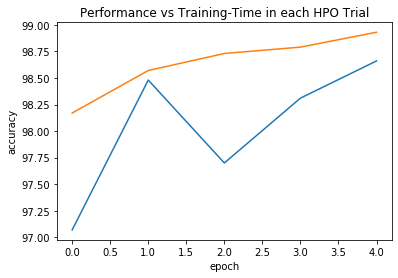

The Best Configuration and Accuracy are: {'lr': 0.028245913732173278, 'net▁hidden_conv': 11, 'net▁hidden_fc▁choice': 0, 'wd': 0.00017160776862349322}, 98.93


In [16]:
myscheduler.get_training_curves(plot=True,use_legend=False)
print('The Best Configuration and Accuracy are: {}, {}'.format(myscheduler.get_best_config(),
                                                               myscheduler.get_best_reward()))
